# Generating EC:reaction ratios for each class and trying to fit power laws
Exploration after conversation with Jake and Doug about reaction ratios for different EC classes.
Ratio of reactions per EC = how many reactions are catalyzed by the same EC.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import powerlaw
import collections
%matplotlib inline
sns.set()

In [3]:
with open("reaction_enzyme.json", "r") as read_file:
    rxn_ec = json.load(read_file)
    
with open('enzyme_reaction.json', 'r') as read_file:
    ec_rxns = json.load(read_file)
    
with open("reaction_edges.json", "r") as read_file:
    rxn_cpds = json.load(read_file)

In [4]:
ec_rxn_values = {}

for k,v in ec_rxns.items():
    ec_rxn_values[k] = len(v)

### turn dict values into floats which can be hist'd

rxns_per_ec = np.fromiter(ec_rxn_values.values(), dtype=float)

In [5]:
sorted(ec_rxn_values.items(), key=lambda x: x[1], reverse=True)

[('ec:1.14.14.1', 67),
 ('ec:2.3.1.85', 32),
 ('ec:2.3.1.86', 32),
 ('ec:2.5.1.18', 24),
 ('ec:1.1.1.50', 23),
 ('ec:1.2.1.5', 23),
 ('ec:1.2.1.3', 22),
 ('ec:2.7.1.1', 22),
 ('ec:4.2.1.17', 22),
 ('ec:2.4.1.17', 20),
 ('ec:1.4.3.4', 19),
 ('ec:2.3.1.16', 19),
 ('ec:2.7.1.48', 19),
 ('ec:3.2.1.22', 19),
 ('ec:1.1.1.1', 18),
 ('ec:1.1.1.35', 17),
 ('ec:3.6.1.5', 16),
 ('ec:2.7.4.6', 15),
 ('ec:3.2.1.23', 15),
 ('ec:1.1.1.21', 14),
 ('ec:3.1.3.5', 14),
 ('ec:3.2.1.52', 14),
 ('ec:1.3.3.6', 13),
 ('ec:3.2.1.21', 13),
 ('ec:3.2.1.74', 13),
 ('ec:1.14.12.12', 12),
 ('ec:1.3.8.7', 12),
 ('ec:2.4.1.69', 12),
 ('ec:2.4.2.1', 12),
 ('ec:2.4.99.8', 12),
 ('ec:3.1.2.2', 12),
 ('ec:3.2.1.18', 12),
 ('ec:1.1.1.100', 11),
 ('ec:1.14.14.81', 11),
 ('ec:1.14.15.24', 11),
 ('ec:1.2.4.4', 11),
 ('ec:2.3.1.41', 11),
 ('ec:3.3.2.9', 11),
 ('ec:5.3.3.1', 11),
 ('ec:1.1.1.145', 10),
 ('ec:1.1.1.211', 10),
 ('ec:1.11.1.21', 10),
 ('ec:1.14.14.42', 10),
 ('ec:1.14.14.45', 10),
 ('ec:1.14.15.4', 10),
 ('ec:1.1

In [10]:
counter = collections.Counter(ec_rxn_values)

In [15]:
counter.most_common()

[('ec:1.14.14.1', 67),
 ('ec:2.3.1.85', 32),
 ('ec:2.3.1.86', 32),
 ('ec:2.5.1.18', 24),
 ('ec:1.1.1.50', 23),
 ('ec:1.2.1.5', 23),
 ('ec:1.2.1.3', 22),
 ('ec:2.7.1.1', 22),
 ('ec:4.2.1.17', 22),
 ('ec:2.4.1.17', 20),
 ('ec:1.4.3.4', 19),
 ('ec:2.3.1.16', 19),
 ('ec:2.7.1.48', 19),
 ('ec:3.2.1.22', 19),
 ('ec:1.1.1.1', 18),
 ('ec:1.1.1.35', 17),
 ('ec:3.6.1.5', 16),
 ('ec:2.7.4.6', 15),
 ('ec:3.2.1.23', 15),
 ('ec:1.1.1.21', 14),
 ('ec:3.1.3.5', 14),
 ('ec:3.2.1.52', 14),
 ('ec:1.3.3.6', 13),
 ('ec:3.2.1.21', 13),
 ('ec:3.2.1.74', 13),
 ('ec:1.14.12.12', 12),
 ('ec:1.3.8.7', 12),
 ('ec:2.4.1.69', 12),
 ('ec:2.4.2.1', 12),
 ('ec:2.4.99.8', 12),
 ('ec:3.1.2.2', 12),
 ('ec:3.2.1.18', 12),
 ('ec:1.1.1.100', 11),
 ('ec:1.14.14.81', 11),
 ('ec:1.14.15.24', 11),
 ('ec:1.2.4.4', 11),
 ('ec:2.3.1.41', 11),
 ('ec:3.3.2.9', 11),
 ('ec:5.3.3.1', 11),
 ('ec:1.1.1.145', 10),
 ('ec:1.1.1.211', 10),
 ('ec:1.11.1.21', 10),
 ('ec:1.14.14.42', 10),
 ('ec:1.14.14.45', 10),
 ('ec:1.14.15.4', 10),
 ('ec:1.1

In [28]:
smaller_things = {}
for k, v in counter.items():
    if v > 1:
        smaller_things[k] = v

In [31]:
big_ecs = {k: counter[k] for k in counter if counter[k] > 1 }

In [41]:
ec1_big, ec2_big, ec3_big, ec4_big, ec5_big, ec6_big = (0 for i in range(6))
for k,v in big_ecs.items():
    if k[3] == '1':
        ec1_big += 1
    if k[3] == '2':
        ec2_big += 1
    if k[3] == '3':
        ec3_big += 1
    if k[3] == '4':
        ec4_big += 1
    if k[3] == '5':
        ec5_big += 1
    if k[3] == '6':
        ec6_big += 1
    

In [52]:
total_big = len(big_ecs)

In [59]:
counter2 = collections.Counter(counter.values())

In [62]:
aba = counter2.most_common()

In [68]:
aba

[(1, 3687),
 (2, 907),
 (3, 373),
 (4, 171),
 (5, 84),
 (6, 76),
 (8, 26),
 (7, 24),
 (10, 20),
 (9, 16),
 (11, 7),
 (12, 7),
 (19, 4),
 (14, 3),
 (22, 3),
 (13, 3),
 (23, 2),
 (32, 2),
 (15, 2),
 (18, 1),
 (17, 1),
 (67, 1),
 (20, 1),
 (24, 1),
 (16, 1)]

<BarContainer object of 25 artists>

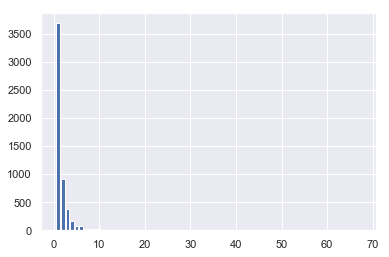

In [69]:
plt.bar(*zip(*aba))

In [64]:
for i in aba:
    print(type(i))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [ ]:
rxn_ec_rat = aba.keys()


In [63]:
aba

[(1, 3687),
 (2, 907),
 (3, 373),
 (4, 171),
 (5, 84),
 (6, 76),
 (8, 26),
 (7, 24),
 (10, 20),
 (9, 16),
 (11, 7),
 (12, 7),
 (19, 4),
 (14, 3),
 (22, 3),
 (13, 3),
 (23, 2),
 (32, 2),
 (15, 2),
 (18, 1),
 (17, 1),
 (67, 1),
 (20, 1),
 (24, 1),
 (16, 1)]

Text(0.5, 1.0, 'ECs with more than 1 rxn')

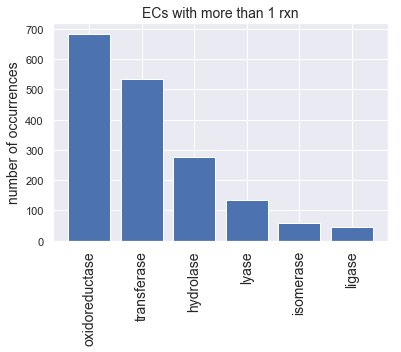

In [50]:
plt.bar(np.arange(6), [ec1_big, ec2_big, ec3_big, ec4_big, ec5_big, ec6_big])
plt.xticks(np.arange(6), ('oxidoreductase', 'transferase', 'hydrolase', 'lyase', 'isomerase', 'ligase'), rotation='vertical', fontsize=14)
plt.ylabel('number of occurrences', fontsize=14)
plt.title('ECs with more than 1 rxn', fontsize=14)

In [ ]:
most_names = {}

most_names['unspecific monooxygenase'] = 67
most_names['fatty acid synthase'] = 32
most_names['fatty-acyl-CoA synthase'] = 32
most_names['galactoside O-acetyltransferase'] = 24
most_names['3alpha-hydroxysteroid 3-dehydrogenase (Si-specific)'] = 23
most_names['aldehyde dehydrongease (NAD+)'] = 23
most_names['aldehyde dehydrongease (NADP)'] = 23
most_names['hexokinase'] = 22
most_names['anoyl-CoA hydratase'] = 22



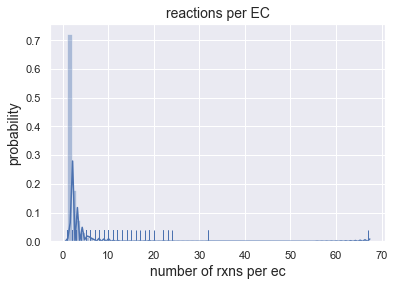

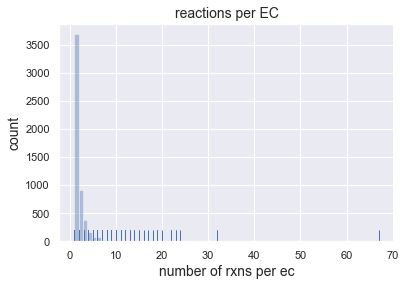

In [6]:
sns.distplot(rxns_per_ec, bins=70, hist=True, rug=True, norm_hist=True)
plt.xlabel('number of rxns per ec', fontsize=14)
plt.ylabel('probability', fontsize=14)
plt.title('reactions per EC', fontsize=14)
plt.savefig('rxns_per_ec_probability')
plt.show()

sns.distplot(rxns_per_ec, bins=70, hist=True, kde=False, rug=True)
plt.xlabel('number of rxns per ec', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.title('reactions per EC', fontsize=14)
plt.savefig('rxns_per_ec_counts')
plt.show()

In [7]:
type(rxns_per_ec)

numpy.ndarray

In [8]:
ec_ratio_dict = {}

for i in ec_rxns.keys():
    ec_ratio_dict[i] = []
    for r in ec_rxns[i]:
        if r in new_ratio_dict.keys():
            ec_ratio_dict[i].append(new_ratio_dict[r])

In [9]:
def make_ec_ratio_dict(ec_ratio_dict, output_dict, identifier):
    for k,v in ec_ratio_dict.items():
        if k[3] == identifier:
            output_dict[k] = v

In [10]:
redox_dict = {}
transfer_dict = {}
hydro_dict = {}
lyase_dict = {}
isomer_dict = {}
ligase_dict = {}

make_ec_ratio_dict(ec_ratio_dict, redox_dict, '1')
make_ec_ratio_dict(ec_ratio_dict, transfer_dict, '2')
make_ec_ratio_dict(ec_ratio_dict, hydro_dict, '3')
make_ec_ratio_dict(ec_ratio_dict, lyase_dict, '4')
make_ec_ratio_dict(ec_ratio_dict, isomer_dict, '5')
make_ec_ratio_dict(ec_ratio_dict, ligase_dict, '6')

In [12]:
redox_ratio = {}
transfer_ratio = {}
hydro_ratio = {}
lyase_ratio = {}
isomer_ratio = {}
ligase_ratio = {}

In [13]:
def make_ec_ratio_dict(ec_dict, new_ratio_dict):            
    for k,v in ec_dict.items():
        new_ratio_dict[k] = len(v)
        
#    listed = sorted(ratio_dict.values())
#    plt.plot(listed, 'ko')
        

In [14]:
make_ec_ratio_dict(redox_dict, redox_ratio)
make_ec_ratio_dict(transfer_dict, transfer_ratio)
make_ec_ratio_dict(hydro_dict, hydro_ratio)
make_ec_ratio_dict(lyase_dict, lyase_ratio)
make_ec_ratio_dict(isomer_dict, isomer_ratio)
make_ec_ratio_dict(ligase_dict, ligase_ratio)

In [ ]:
plt.plot((redox_ratio.values()), 'ko')
plt.plot((transfer_ratio.values()), 'go')
plt.plot((hydro_ratio.values()), 'ro')
plt.plot((lyase_ratio.values()), 'bo')
plt.plot((isomer_ratio.values()), 'co')
plt.plot((ligase_ratio.values()), 'yo')
plt.ylabel('# of rxns for given EC')
plt.savefig('ec_rxn_ratios')
plt.show()

plt.plot(sorted(redox_ratio.values(), reverse=True), 'ko')
plt.plot(sorted(transfer_ratio.values(), reverse=True), 'go')
plt.plot(sorted(hydro_ratio.values(), reverse=True), 'ro')
plt.plot(sorted(lyase_ratio.values(), reverse=True), 'bo')
plt.plot(sorted(isomer_ratio.values(), reverse=True), 'co')
plt.plot(sorted(ligase_ratio.values(), reverse=True), 'yo')
plt.xlabel('descending ec:rxn order')
plt.ylabel('# of rxns for given EC')
plt.savefig('ec_rxn_ratios_descending')
plt.show()

plt.plot(sorted(redox_ratio.values()), 'ko')
plt.plot(sorted(transfer_ratio.values()), 'go')
plt.plot(sorted(hydro_ratio.values()), 'ro')
plt.plot(sorted(lyase_ratio.values()), 'bo')
plt.plot(sorted(isomer_ratio.values()), 'co')
plt.plot(sorted(ligase_ratio.values()), 'yo')
plt.xlabel('ascending ec:rxn order')
plt.ylabel('# of rxns for given EC')
plt.savefig('ec_rxn_ratios_ascending')
plt.show()

In [ ]:
key_mapping = {'1':'redox', '2':'transfer', '3':'hydro', '4':'lyase',
               '5':'isomer', '6':'ligase', '7':'translocase'}

all_ecs = []

for k in ec_rxns:
    enz_dict2 = {}

    enz_dict2['n_rxns'] = len(ec_rxns[k])
    enz_dict2['ec_class'] = key_mapping[k[3]]
    all_ecs.append(enz_dict2)

In [ ]:
this_df = pd.DataFrame(all_ecs)

In [ ]:
this_df.plot.bar(y='n_rxns')

In [ ]:
this_df.groupby('ec_class').describe()

In [ ]:
plt.plot(redox_rxn_ec, 'k-', markersize=3, label='redox')
plt.plot(transfer_rxn_ec, 'b-', markersize=3, label='transfer')
plt.plot(hydro_rxn_ec, 'r-', markersize=3, label='hydro')
plt.plot(lyase_rxn_ec, 'g-', markersize=3, label='lyase')
plt.plot(isomer_rxn_ec, 'm-', markersize=3, label='isomer')
plt.plot(ligase_rxn_ec, 'y-', markersize=3, label='ligase')
plt.ylabel('number of ECs associated with a reaction')
plt.legend(loc='best')
plt.show()

In [ ]:
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharex=True, sharey=True, figsize=(12,7))

ax1.plot(redox_rxn_ec, 'k', label='redox')
#ax1.set_title('Sharing both axes')
#ax6.set_ylabel('number of ECs for a given reaction')
ax2.plot(transfer_rxn_ec, 'b', label='transfers')
ax3.plot(hydro_rxn_ec, 'r', label='hydros')
ax4.plot(lyase_rxn_ec, 'g', label='lyases')
ax5.plot(isomer_rxn_ec, 'c', label='isomers')
ax6.plot(ligase_rxn_ec, 'y', label='ligases')
ax.set_xlabel('arbitrary arrangement of rxns for EC class')


In [ ]:
plt.plot(ec_rxn_relations)

In [ ]:
non_121 = 0
for i in ec_rxn_relations:
    if i > 1:
        non_121 += 1

In [ ]:
non_121

In [ ]:
1663/7111

In [ ]:
data = sorted(redox_ratio.values(), reverse=True)

In [ ]:
Fit = powerlaw.Fit(data)
Fit.power_law.alpha
Fit.power_law.sigma

In [ ]:
Fit.distribution_compare('power_law', 'exponential')

In [ ]:
simulated = fit